In [10]:
import import_ipynb
import sys
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from dataset_Loader.data_loader import MNIST
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [11]:
print('\nLoading Data...')
data = MNIST('./dataset_Loader/dataset/')



Loading Data...


In [12]:
print('\nLoading Training Data...')
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)

print('\nLoading Testing Data...')
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)


Loading Training Data...

Loading Testing Data...


In [13]:
#Features
X = train_img

#Labels
y = train_labels

print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.1)


Preparing Classifier Training and Validation Data...


In [16]:
print('\nKNN Classifier with n_neighbors = 6, algorithm = auto, n_jobs = 10')
print('\nPickling the Classifier for Future Use...')
clf = KNeighborsClassifier(n_neighbors=5,algorithm='auto',n_jobs=10)
clf.fit(X_train,y_train)



KNN Classifier with n_neighbors = 6, algorithm = auto, n_jobs = 10

Pickling the Classifier for Future Use...


KNeighborsClassifier(n_jobs=10)

In [17]:
with open('MNIST_KNN.pickle','wb') as f:
	pickle.dump(clf, f)

In [18]:
pickle_in = open('MNIST_KNN.pickle','rb')
clf = pickle.load(pickle_in)

In [19]:
print('\nCalculating Accuracy of trained Classifier...')
confidence = clf.score(X_test,y_test)


Calculating Accuracy of trained Classifier...


In [20]:
print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_test)


Making Predictions on Validation Data...


In [21]:
print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)


Calculating Accuracy of Predictions...


In [22]:
print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test,y_pred)


Creating Confusion Matrix...


In [23]:
print('\nKNN Trained Classifier Confidence: ',confidence)
print('\nPredicted Values: ',y_pred)
print('\nAccuracy of Classifier on Validation Image Data: ',accuracy)
print('\nConfusion Matrix: \n',conf_mat)


KNN Trained Classifier Confidence:  0.9748333333333333

Predicted Values:  [8 2 1 ... 3 1 6]

Accuracy of Classifier on Validation Image Data:  0.9748333333333333

Confusion Matrix: 
 [[594   0   0   0   0   0   0   1   0   0]
 [  0 670   0   2   0   0   0   4   0   0]
 [  2   6 567   1   0   0   0   8   0   0]
 [  0   0   5 584   0   2   0   3   3   1]
 [  0   2   0   0 570   0   0   0   0  11]
 [  1   1   0   5   0 513   3   1   0   3]
 [  5   2   1   0   0   0 600   0   0   0]
 [  0   4   3   0   0   0   0 580   0   6]
 [  1   8   3   7   3   7   2   1 562   4]
 [  3   4   0   4   4   1   0  10   3 609]]


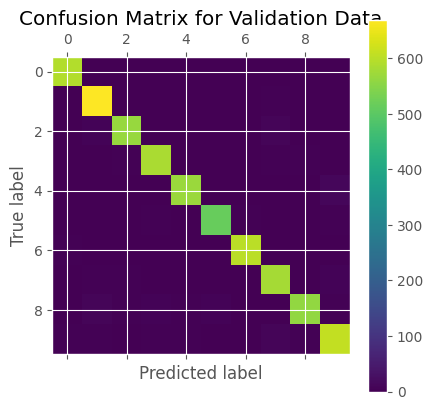

In [24]:
# Plot Confusion Matrix Data as a Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [25]:
print('\nMaking Predictions on Test Input Images...')
test_labels_pred = clf.predict(test_img)

print('\nCalculating Accuracy of Trained Classifier on Test Data... ')
acc = accuracy_score(test_labels,test_labels_pred)

print('\n Creating Confusion Matrix for Test Data...')
conf_mat_test = confusion_matrix(test_labels,test_labels_pred)

print('\nPredicted Labels for Test Images: ',test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ',acc)
print('\nConfusion Matrix for Test Data: \n',conf_mat_test)


Making Predictions on Test Input Images...

Calculating Accuracy of Trained Classifier on Test Data... 

 Creating Confusion Matrix for Test Data...

Predicted Labels for Test Images:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Test Images:  0.9674

Confusion Matrix for Test Data: 
 [[ 975    1    1    0    0    1    1    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  12   11  986    2    1    0    0   15    5    0]
 [   0    3    4  974    1   14    1    6    3    4]
 [   3    6    0    0  944    0    4    2    1   22]
 [   5    0    0   14    1  860    4    1    2    5]
 [   5    3    0    0    3    2  945    0    0    0]
 [   0   22    4    0    3    0    0  989    0   10]
 [   8    3    6   14    6   13    6    4  909    5]
 [   6    7    3    8    7    3    1   13    2  959]]


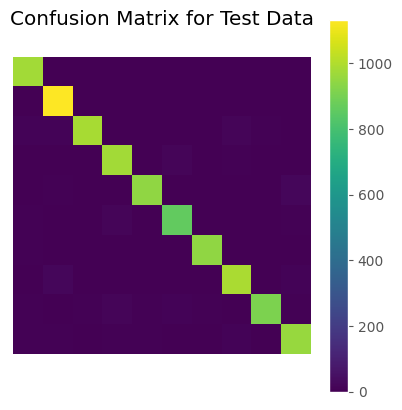

In [26]:
# Plot Confusion Matrix for Test Data
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

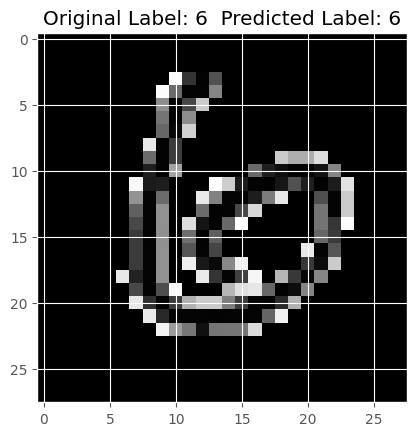

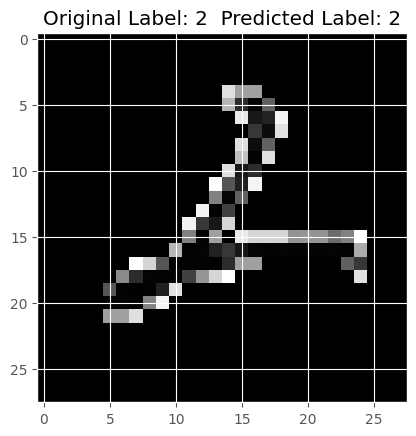

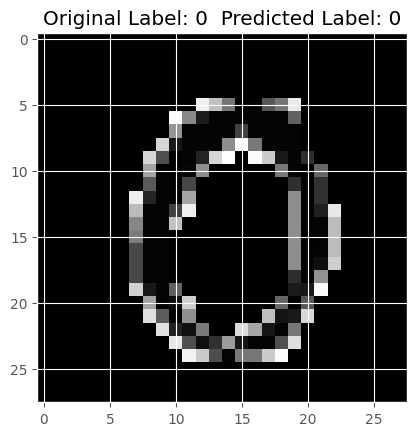

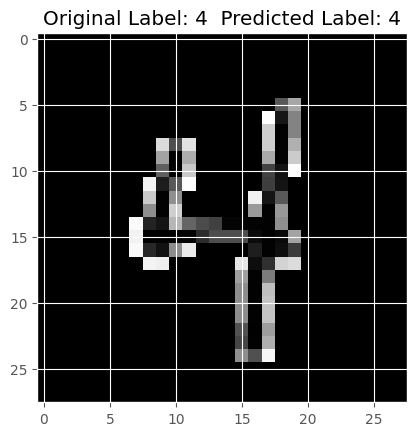

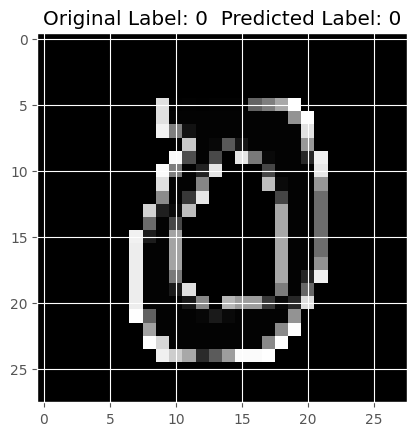

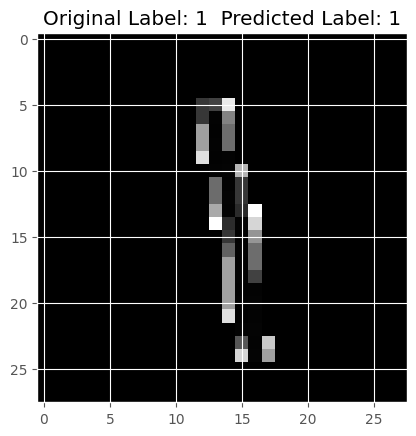

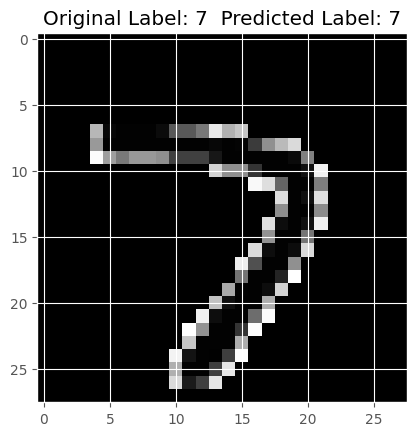

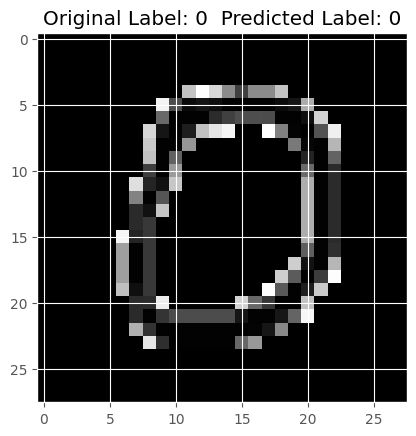

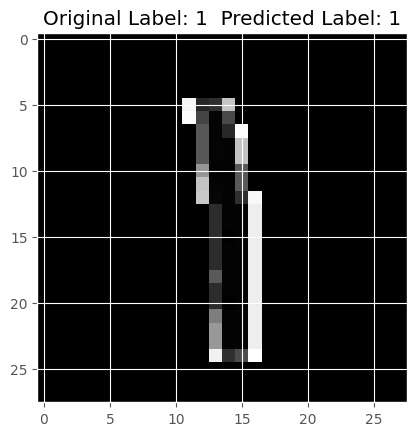

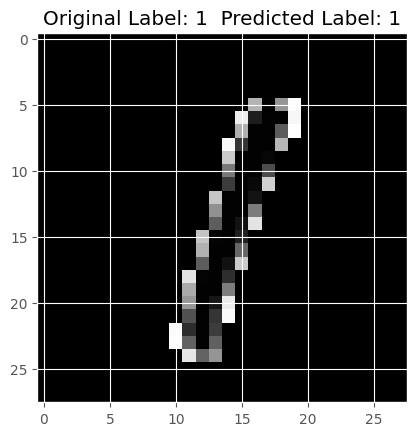

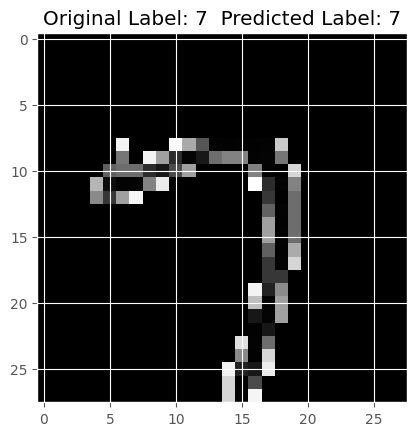

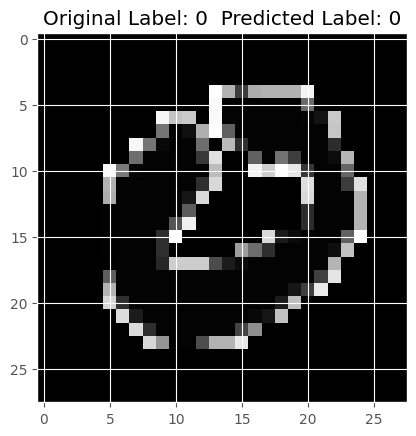

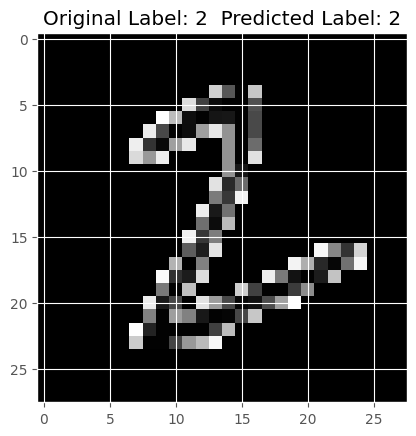

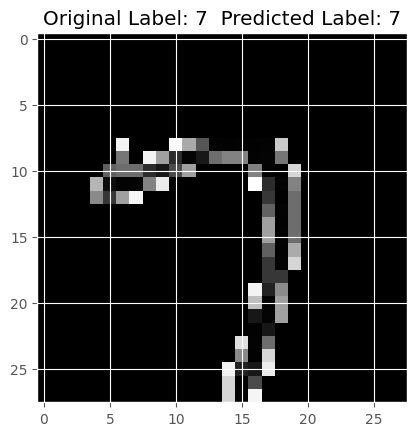

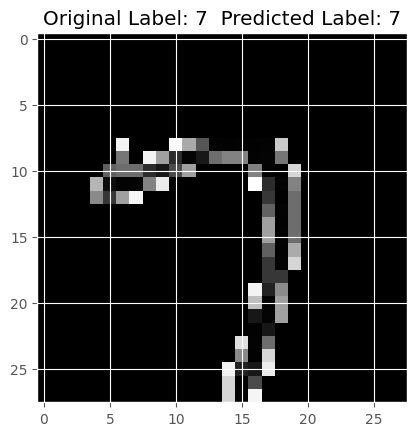

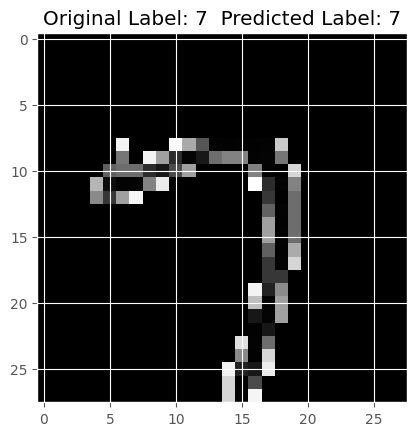

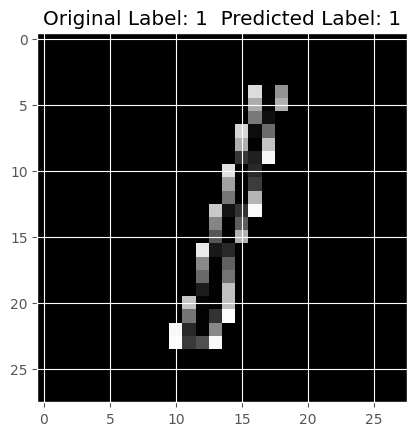

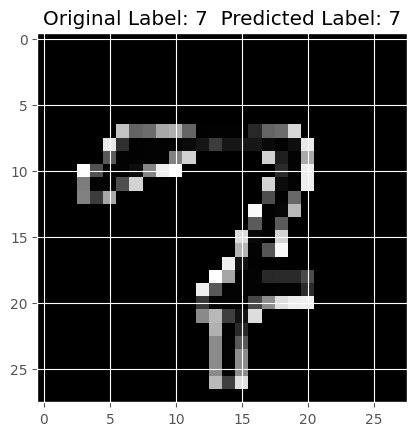

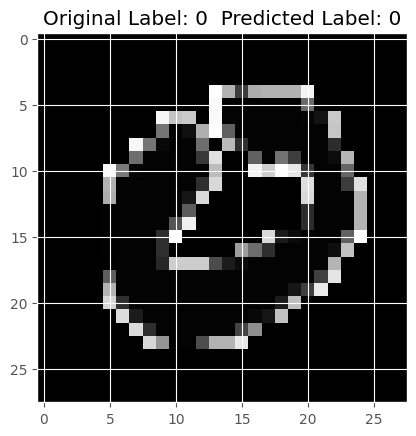

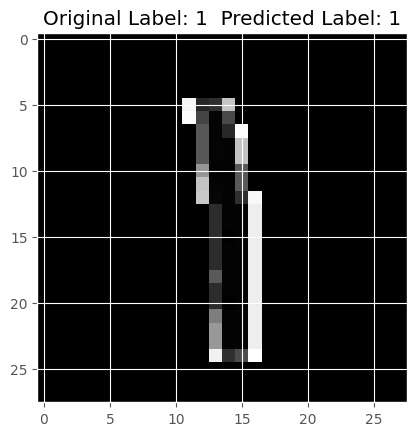

In [27]:
# Show the Test Images with Original and Predicted Labels
a = np.random.randint(1,50,20)
for i in a:
	two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
	plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],test_labels_pred[i]))
	plt.imshow(two_d, interpolation='nearest',cmap='gray')
	plt.show()